# Работа №1. Предельные теоремы

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

### 1. Теорема Бернулли

Если производится $n$ независимых испытаний случайного события $A$, вероятность которого $P(A) = p$, то относительная частота ${\mu\over{n}}$ появления события $A$ ($\mu$ - число появлений $A$) при большом $n$ приближенно равна вероятности $p$:
$$
{\mu\over{n}} ≈ p.
$$
Уточнение: будем писать
$$
{\mu\over{n}} \rightarrow p \text{ при } n \rightarrow \inf,
$$
если для любого $\varepsilon \gt 0$ и для достоточно больших $n$ соотношение
$$
\big| {\mu\over{n}} - p \big| \lt \varepsilon
$$
выполняется с вероятностью, стремящейся к 1 с ростом $n$; запишем это так:
$$
P\big( \big| {\mu\over{n}} - p \big| \lt \varepsilon \big) \rightarrow 1 \text{ при } n \rightarrow \inf.
$$
В этом состоит теорема Бернулли. Заметим, что теорема не утверждает, что соотношение $\big| {\mu\over{n}} - p \big| \lt \varepsilon$ достоверно, однока, елси $n$ достаточно велико, то вероятность его выполнения близка к 1 (например, 0.98 или 0.999), что практически достоверно. Если собираемся провести эксперимент, состоящий из этого достоточно большого числа $n$ испытаний, то можем быть уверены, что соотношение будет выполнено. Проверим это не абсолютно достоверное утверждение.

**Пример. Бросание симметричной монеты**  
Вероятность появления герба $p=0.5$. Можно показать (с помощью центральной предельной теоремы), что, например, если $n \geq ({1.5\over{\varepsilon}})^2$, то соотношение из теоремы Бернулли выполняется с вероятностью 0.997, а если $n \geq ({1.3\over{\varepsilon}})^2$, то с вероятностью 0.99; последняя в данном случае нас вплне устраивает как практическая достоверность. Положим $\varepsilon = 0.1$l тогда соотношение
$$
\big| {\mu\over{n}} - 0.5 \big| \lt 0.1
$$
выполняется с вероятностью 0.99 при $n \ge 170$. Если $\varepsilon = 0.03$, то соотношение
$$
\big| {\mu\over{n}} - 0.5 \big| \lt 0.03
$$
выполняется с вероятностью 0.99 при $n \ge 1850$. Мы уверены, что проведя 170 бросаний монеты, получим первый результат, а, проведя 1850 бросаний, получим второй.  
Бросание монеты моделируем генерацией случайной величины $\alpha$, принимающей значения 1("герб") и 0("цифра") с вероятностями 0.5. Число появлений "герба" в $n$ испытаниях
$$
\mu = \sum\limits_{k=1}^n \alpha_k,
$$
где $\alpha_k$ - результат k-го испытания.

In [32]:
n = 170
array = np.array([np.random.randint(0, 2) for _ in range(n)])
f = array.sum() / n
print('Верно' if np.abs(f - 0.5) < 0.1 else 'Ложно')

Верно


In [33]:
n = 1850
array = np.array([np.random.randint(0, 2) for _ in range(n)])
f = array.sum() / n
print('Верно' if np.abs(f - 0.5) < 0.03 else 'Ложно')

Верно


### Закон больших чисел в форме Чебышева

#### 2.1. Основное утверждение
Одно из основных утверждений закона больших чисел осстоит в том, что значение среднеарифметического ${1\over{n}} \sum\limits_{i=1}^n \xi_i$ случайных величин с равными математическими ожиданиями $M\xi_i=a$ при большом $n$ (при некоторых широких ограничениях) оказывается приближенно равным $a$:
$$
{1\over{n}} \sum\limits_{i=1}^n \xi_i ≈ a.
$$
Уточним: будем писать
$$
{1\over{n}} \sum\limits_{i=1}^n \xi_i \rightarrow a \text{ при } n \rightarrow \inf,
$$
если для любого $\varepsilon \gt 0$ и достаточно больших $n$ соотношение
$$
\big| {1\over{n}} \sum\limits_{i=1}^n \xi_i - a \big| \lt \varepsilon
$$
выполняется с вероятностью, стремящейся к 1 с ростом $n$; запишем это так:
$$
P\big( \big| {1\over{n}} \sum\limits_{i=1}^n \xi_i - a \big| \lt \varepsilon \big) \rightarrow 1 \text{ при } n \rightarrow \inf.
$$
Это одно из утверждений закона больших чисел. Заметим, что, как и теорема Бернулли, оно не означает, что соотношение $\big| {1\over{n}} \sum\limits_{i=1}^n \xi_i - a \big| \lt \varepsilon$ достоверно; однако, если $n$ достаточно велико, то вероятность его выполнения близка к 1, например, 0.98 или 0.999, что означает практически достоверно. Приведем полную формулировку одной из теорем закона больших чисел в форме Чебышева.  
**Теоремы Чебышева.** Если $\xi_1, ..., \xi_n, ...$ - последовательность попарно независимых слчайных величин, имеющих конечные дисперсии, ограниченные одной и той же постоянной:
$$
D\xi_1 \lt c, D\xi_2 \lt c, ..., D\xi_n \lt c, ...,
$$
то для любого $\varepsilon \gt 0$
$$
P\big( \big| {1\over{n}}\sum\limits_{i=1}^n\xi_i - {1\over{n}}\sum\limits_{i=1}^nM\xi_i \big| \lt \varepsilon \big) \rightarrow 1 \text{ при } n \rightarrow \inf.
$$

#### 2.2 Испытание практически достоверного события
**Пример. Невыполнение закона больших чисел.**  
Рассморим случайную величину, распределенную по закону Коши с плотностью
$$
p(x) = {1\over{\pi}} {1\over{1 + x^2}}.
$$
Заметим, что плотность симметрична относительно нуля, однако, 0 не является математическим ожиданием; это распределение не имеет математического ожидания. Для последовательности независимых случайных величин, распределенынх по закону Коши, закон больших чисел не выполняется. Если бы среднее арифметическое $\overline{\xi} = {1\over{n}} \sum\limits_{i=1}^n \xi_i$ сходилось с ростом $n$ к какой-либо константе, то, в силу симметрии распределения, такой константой мог быть только 0. Однако, 0 не является точкой сходимости. Действительно, можно показать, что при любом $\varepsilon \gt 0$ и при любом сколь угодно большом $n$
$$
\big| {1\over{n}} \sum\limits_{i=1}^n \xi_i \big| \gt \varepsilon
$$
с вероятностью $P = 1 - {2\over{\pi}}arctg\varepsilon$. Эта вероятность, как видно, не стремится к 0 с ростом n. Например, если $\varepsilon = 0.03$, то вероятность выполнения $\big| {1\over{n}} \sum\limits_{i=1}^n \xi_i \big| \gt \varepsilon$ равна приближенно $P ≈ 0.98$, т.е. событие практически достоверно, и можно уверенно ожидать его выполнения с одного раза. Если $\varepsilon = 1$, то вероятность равна 0.5, и выполнение его хотя бы раз можно уверенно ожидать, проделав 7 экспериментов (так как вероятность невыполнения ни разу равна $(0.5)^7 = {1\over{128}}$). И это при любом фиксированном $n$, например, $n = 1000$. Проверим это экспериментально

In [34]:
def generate_sample(n):
    a = 0
    b = 1
    return np.random.standard_cauchy(n) * b + a
n = 1000
sample = [(generate_sample(n)) for _ in range(7)]

In [35]:
# средние значения
for s in sample:
    print(s.mean())

0.8069421419244467
0.4540235501781319
12.19838663725593
1.3991375904742922
0.6957918181058941
-0.9792757133577576
-0.8793607354405072


In [36]:
# проверка, что хотя бы в одной выборке модуль среднего превосходит 1
more_than_1 = False
for i in range(len(sample)):
    if np.abs(sample[i].mean()) > 1:
        more_than_1 = True
print('Модуль среднего больше 1' if more_than_1 else 'Модуль среднего меньше 1')

Модуль среднего больше 1


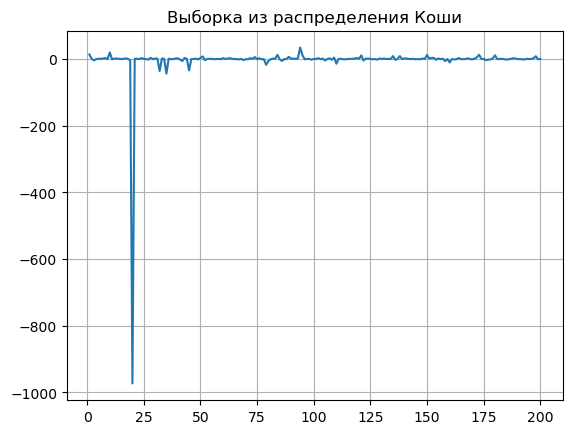

In [37]:
N = 200
x = np.arange(1, N + 1)
y = generate_sample(N)
plt.title('Выборка из распределения Коши')
plt.plot(x, y)
plt.grid()

#### 2.3 Сжатие распределения с ростом числа слагаемых
Закон больших числел в форме Чебышева означает, что распределение случайной величины
$$
\overline{\xi} = {1\over{n}} \sum\limits_{i=1}^n \xi_i
$$
сжимается с ростом $n$. Если математические ожидания одинаковы, то есть $M\xi_i = a$, то сжатие происходит в окрестности точки $a$.  
Аналитически иллюстрировать мжатие можно, если распределение для $\overline{\xi_n}$ легко выписывается. Например, если $\xi_i$ распределены нормально $N(a, \sigma^2)$, то случайная величина $\overline{\xi_n}$ распределена по $N(a, {\sigma^2\over{n}})$.  
Статистически убедиться в сжатии можно, наблюдая гистограммы при различных значениях $n$ (например, для $n=10, 40, 160, 640$). Сгенерируем $k$ раз (например, для $k = 20$) случайную величину $\overline{\xi_n} = \overline{\xi}: \overline{x_1}, ..., \overline{x_k}$. Сжатие можно увиедть определением для каждого $n$ по $\overline{x_1}, ..., \overline{x_k}$ минимального $\overline{x_{min}}$, максимального $\overline{x_{max}}$ значений и размаха $w = \overline{x_{max}} - \overline{x_{min}}$

In [38]:
def generate_uniform(n):
    k = 20
    return np.array([[np.random.uniform(0, 1) for _ in range(n)] for _ in range(k)])

def mean_std(smpl):
    means = []
    for i in range(len(smpl)):
        means.append(smpl[i].mean())
    return np.array(means).std()

def get_means(smpl):
    means = means = []
    for i in range(len(smpl)):
        means.append(smpl[i].mean())
    return np.array(means)

In [39]:
uniform_n10  = generate_uniform(10)
uniform_n40  = generate_uniform(40)
uniform_n160 = generate_uniform(160)
uniform_n640 = generate_uniform(640)
std_n10  = mean_std(uniform_n10)
std_n40  = mean_std(uniform_n40)
std_n160 = mean_std(uniform_n160)
std_n640 = mean_std(uniform_n640)

In [40]:
n_column = [10, 40, 160, 640]
std_column = [std_n10, std_n40, std_n160, std_n640]
pd.DataFrame({'n': n_column, 'std': std_column})

,n,std
0,10,0.087411
1,40,0.044707
2,160,0.023169
3,640,0.010605


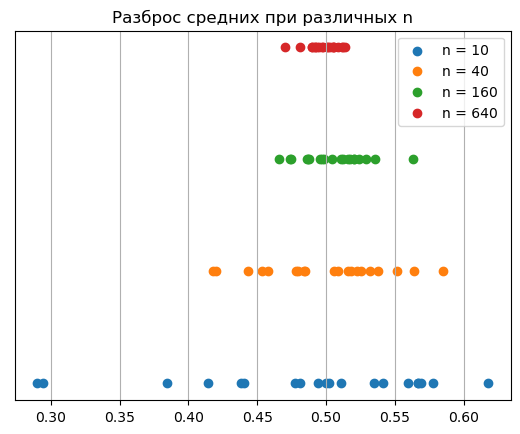

In [41]:
means_n10 = get_means(uniform_n10)
means_n40 = get_means(uniform_n40)
means_n160 = get_means(uniform_n160)
means_n640 = get_means(uniform_n640)
plt.scatter(means_n10,  [1 for _ in range(20)], label='n = 10')
plt.scatter(means_n40,  [2 for _ in range(20)], label='n = 40')
plt.scatter(means_n160, [3 for _ in range(20)], label='n = 160')
plt.scatter(means_n640, [4 for _ in range(20)], label='n = 640')
plt.title('Разброс средних при различных n')
plt.legend()
plt.yticks([])
plt.grid()

### 3. Усиленный закон больших чисел
**Теорема Бореля.** Относительная частота $f_n = {\mu_n\over{n}}$ появления случайного события с ростом числа $n$ независимых испытаний стремится к истинной вероятности $p$:
$$
{\mu_n\over{n}} \rightarrow p \text{ с вероятностью 1}
$$
Другими словами, при любом эксперименте с бесконечным числом испытаний имеет место сходимость последовательности $f_n$ к $p$.  
Будем говорить, что последовательность случайных величин $\xi_1, \xi_2, ..., \xi_n, ...$ подчиняется усиленному закону больших чисел, если
$$
{1\over{n}} \sum\limits_{i=1}^n \xi_i - {1\over{n}} \sum\limits_{i=1}^n M\xi_i \rightarrow 0 \text{ при } n \rightarrow \inf \text{ с вероятностью 1}
$$
В частном случае, при равных математичесикх ожиданиях, $M\xi_i = a$, это означает
$$
{1\over{n}} \sum\limits_{i=1}^n \xi_i \rightarrow a \text{ при } n \rightarrow \inf \text{ с вероятностью 1}
$$
Достаточное выполнение этого условия, дает  
**Теорема Колмогорова.** Если последовательность взаимно независимых случайных величин $\xi_1, \xi_2, ..., \xi_n, ...$ удовлетворяет условию
$$
{1\over{n^2}} \sum\limits_{n=0}^{\inf}D\xi_n \lt \inf,
$$
то она подчиняется усиленному закону больших чисел.  
Для независимых и одинаково распределенный случайных величин справедлив окончательный результат:  
**Теорема.** Необходимым и достаточным условием для применимости усиленного закона больших чисел к последовательности случайных величин является существование математического ожидания.  
Проиллюстрируем ${\mu_n\over{n}} \rightarrow p$ на примере бросания симметричной монеты, а ${1\over{n}} \sum\limits_{i=1}^n \xi_i \rightarrow a \text{ при } n \rightarrow \inf$ на примере равномерно $R[0, 1]$ распределенных случайных величин.

#### Эксперименты с монетой

In [42]:
# 0 - орел
# 1 - герб
n = 500
data = np.array([np.array([np.random.randint(0, 2) for _ in range(n)]) for _ in range(3)])

f_mean = []
for i in range(len(data)):
    temp = [data[i][0]]
    for j in range(1, len(data[i])):
        temp.append((j*temp[j-1] + data[i][j]) / (j+1))
    f_mean.append(temp)

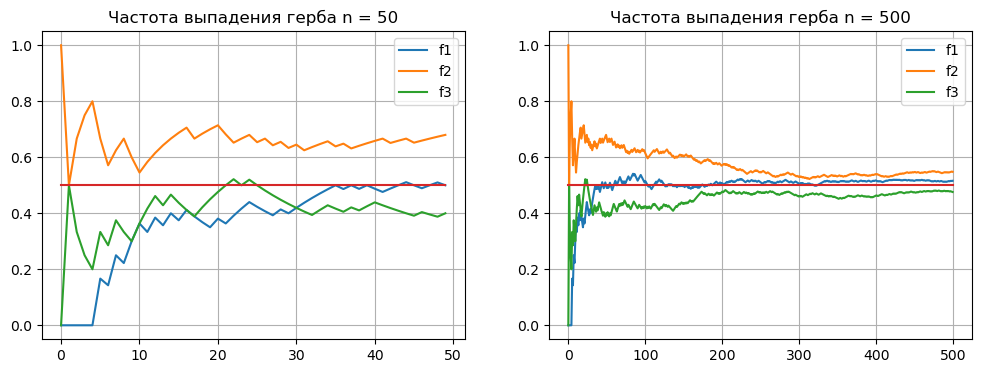

In [43]:
d1, d2 = 50, 500
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax = ax.ravel()
ax[0].plot(range(d1), f_mean[0][0:d1], label='f1', linestyle='-')
ax[0].plot(range(d1), f_mean[1][0:d1], label='f2', linestyle='-')
ax[0].plot(range(d1), f_mean[2][0:d1], label='f3', linestyle='-')
ax[0].plot(range(d1), [0.5 for _ in range(d1)])
ax[0].set_title(f'Частота выпадения герба n = {d1}')
ax[0].legend()
ax[0].grid()
ax[1].plot(range(d2), f_mean[0][0:d2], label='f1', linestyle='-')
ax[1].plot(range(d2), f_mean[1][0:d2], label='f2', linestyle='-')
ax[1].plot(range(d2), f_mean[2][0:d2], label='f3', linestyle='-')
ax[1].plot(range(d2), [0.5 for _ in range(d2)])
ax[1].set_title(f'Частота выпадения герба n = {d2}')
ax[1].legend()
ax[1].grid()

#### Эксперименты со случайными числами, распределенными равномерно на отрезке [0, 1]

In [44]:
n = 500
data = np.array([np.array([np.random.uniform(0, 1) for _ in range(n)]) for _ in range(3)])

f_mean = []
for i in range(len(data)):
    temp = [data[i][0]]
    for j in range(1, len(data[i])):
        temp.append((j*temp[j-1] + data[i][j]) / (j+1))
    f_mean.append(temp)

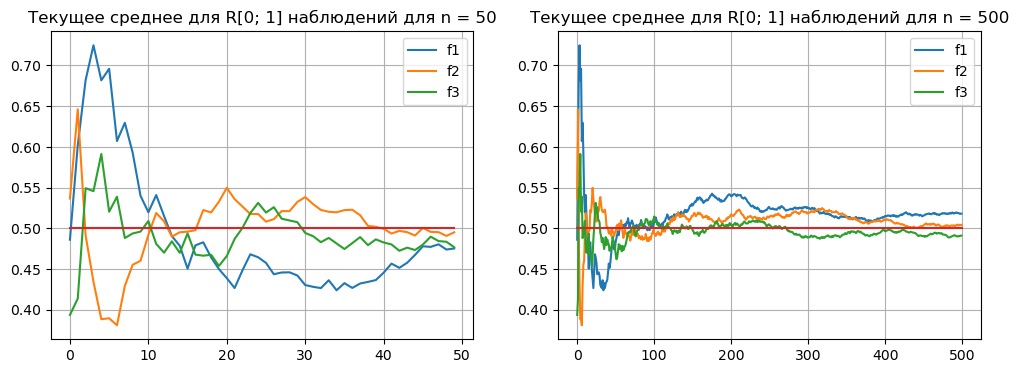

In [45]:
d1, d2 = 50, 500
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax = ax.ravel()
ax[0].plot(range(d1), f_mean[0][0:d1], label='f1', linestyle='-')
ax[0].plot(range(d1), f_mean[1][0:d1], label='f2', linestyle='-')
ax[0].plot(range(d1), f_mean[2][0:d1], label='f3', linestyle='-')
ax[0].plot(range(d1), [0.5 for _ in range(d1)])
ax[0].set_title(f'Текущее среднее для R[0; 1] наблюдений для n = {d1}')
ax[0].legend()
ax[0].grid()
ax[1].plot(range(d2), f_mean[0][0:d2], label='f1', linestyle='-')
ax[1].plot(range(d2), f_mean[1][0:d2], label='f2', linestyle='-')
ax[1].plot(range(d2), f_mean[2][0:d2], label='f3', linestyle='-')
ax[1].plot(range(d2), [0.5 for _ in range(d2)])
ax[1].set_title(f'Текущее среднее для R[0; 1] наблюдений для n = {d2}')
ax[1].legend()
ax[1].grid()

#### Пример невыполнения закона
Пример невыполнения закона больших чисел проиллюстрируем на последовательностях случайных чисел, распределенных по закону Коши.

In [46]:
n = 500
data = np.array([np.array([np.random.uniform(0, 1) for _ in range(n)]) for _ in range(3)])

for i in range(len(data)):
    data[i] = np.tan(data[i] * np.pi)

f_mean = []
for i in range(len(data)):
    temp = [data[i][0]]
    for j in range(1, len(data[i])):
        temp.append((j*temp[j-1] + data[i][j]) / (j+1))
    f_mean.append(temp)

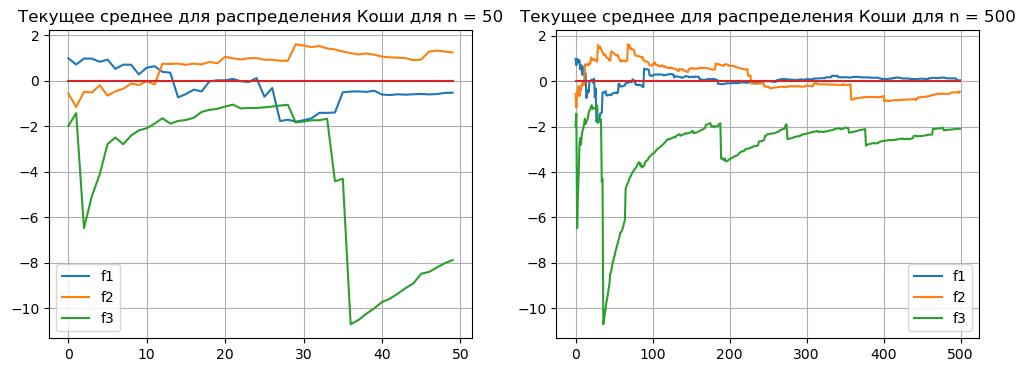

In [47]:
d1, d2 = 50, 500
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax = ax.ravel()
ax[0].plot(range(d1), f_mean[0][0:d1], label='f1', linestyle='-')
ax[0].plot(range(d1), f_mean[1][0:d1], label='f2', linestyle='-')
ax[0].plot(range(d1), f_mean[2][0:d1], label='f3', linestyle='-')
ax[0].plot(range(d1), [0 for _ in range(d1)])
ax[0].set_title(f'Текущее среднее для распределения Коши для n = {d1}')
ax[0].legend()
ax[0].grid()
ax[1].plot(range(d2), f_mean[0][0:d2], label='f1', linestyle='-')
ax[1].plot(range(d2), f_mean[1][0:d2], label='f2', linestyle='-')
ax[1].plot(range(d2), f_mean[2][0:d2], label='f3', linestyle='-')
ax[1].plot(range(d2), [0 for _ in range(d2)])
ax[1].set_title(f'Текущее среднее для распределения Коши для n = {d2}')
ax[1].legend()
ax[1].grid()

#### Задание
Промоделировать и посмотреть на графиках поведение средне-арифметического как функцию $n$ для случайных величин, распределенных с плотностью
$$
p(x) = {c\over{(|x|+1)^{1+1/a}}}, -\inf \lt x \lt \inf, \text{ где } a \gt 0, c={1\over{2a}}
$$
При $a \lt 1$ математическое ожидание существует, но при $a \ge 1$ это не так. При увеличении $a$ (1, 1.5, 2, 5, 10) скачки в среднеарифметическом (как функции $n$) будут увеличиваться. Генерацию случайных чисел можно сделать по формуле:
$$
x = (u^{-a} - 1)\varepsilon, \text{ где } u ~ R[0, 1], \text{ а } \varepsilon = \pm 1 \text{ с вероятностями 1/2.}
$$

In [48]:
n = 500
a = 1
c = 1 / (2*a)
data = np.array([np.array([(np.random.uniform(0, 1) ** (-a) - 1) * (1 if np.random.randint(0, 2) else -1)
                           for _ in range(n)]) for _ in range(3)])

f_mean = []
for i in range(len(data)):
    temp = [data[i][0]]
    for j in range(1, len(data[i])):
        temp.append((j*temp[j-1] + data[i][j]) / (j+1))
    f_mean.append(temp)

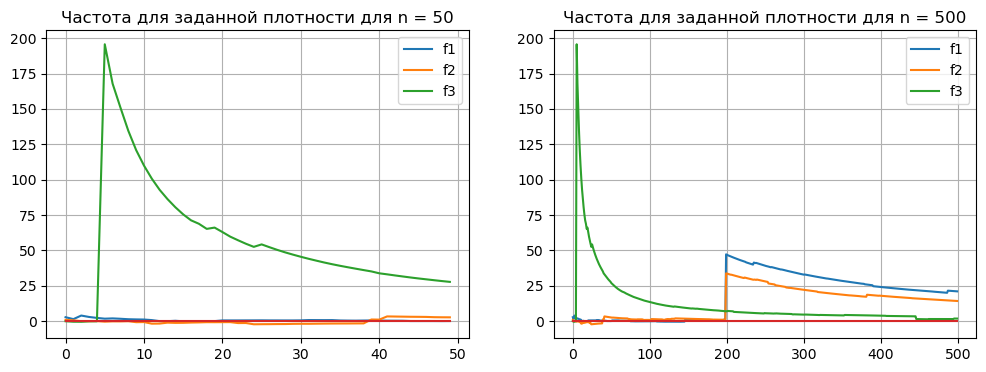

In [49]:
d1, d2 = 50, 500
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax = ax.ravel()
ax[0].plot(range(d1), f_mean[0][0:d1], label='f1', linestyle='-')
ax[0].plot(range(d1), f_mean[1][0:d1], label='f2', linestyle='-')
ax[0].plot(range(d1), f_mean[2][0:d1], label='f3', linestyle='-')
ax[0].plot(range(d1), [0 for _ in range(d1)])
ax[0].set_title(f'Частота для заданной плотности для n = {d1}')
ax[0].legend()
ax[0].grid()
ax[1].plot(range(d2), f_mean[0][0:d2], label='f1', linestyle='-')
ax[1].plot(range(d2), f_mean[1][0:d2], label='f2', linestyle='-')
ax[1].plot(range(d2), f_mean[2][0:d2], label='f3', linestyle='-')
ax[1].plot(range(d2), [0 for _ in range(d2)])
ax[1].set_title(f'Частота для заданной плотности для n = {d2}')
ax[1].legend()
ax[1].grid()

### 4. Теорема Гливенко - основная теорема статистики
Пусть $x_1, x_2, ..., x_n$ - выборка из $n$ независимых наблюдений над случайной величиной $X$ с функцией распределения $F(x)$. Расположим наблюдения в порядке возрастания; получим
$$
x_{(1)} \le x_{(2)} \le ... \le x_{(n)} \text{ - вариационный ряд.}
$$
Определим функцию эмпирического распределения
$$
F_n^*(x) = F_n^*(x; x_1, x_2, ..., x_n) = {\mu_n(x)\over{n}}, \text{ где } \mu_n(x) \text{ - число тех наблюдений, для которых } x_i < x.
$$
Ясно, что $F_n^*(x)$ - ступенчатая функция; это функция распределения, которое получается, если значениям $x_1, ..., x_n$ присвоить вероятности, равные ${1\over{n}}$. Ясно, что $F_n^*(x)$ - функция случайная, так как зависит от наблюдений $x_1, ..., x_n$.  
**Теорема Гливенко**
$$
\sup\limits_{x}|F_n(x) - F(x)| \rightarrow 0 \text{ при } n \rightarrow \inf \text{ с вероятностью 1}.
$$
Проиллюстрируем эту теорему на примерах наблюдений над случайной величиной, распределенной по равномерному на $[0, 1]$ закону.

In [50]:
n1, n2, n3, n4 = 10, 40, 160, 640

data1 = np.array([np.random.uniform(0, 1) for _ in range(n1)])
data2 = np.array([np.random.uniform(0, 1) for _ in range(n2)])
data3 = np.array([np.random.uniform(0, 1) for _ in range(n3)])
data4 = np.array([np.random.uniform(0, 1) for _ in range(n4)])

Text(0.5, 0.98, 'Функции эмпирического и теоретического распределений')

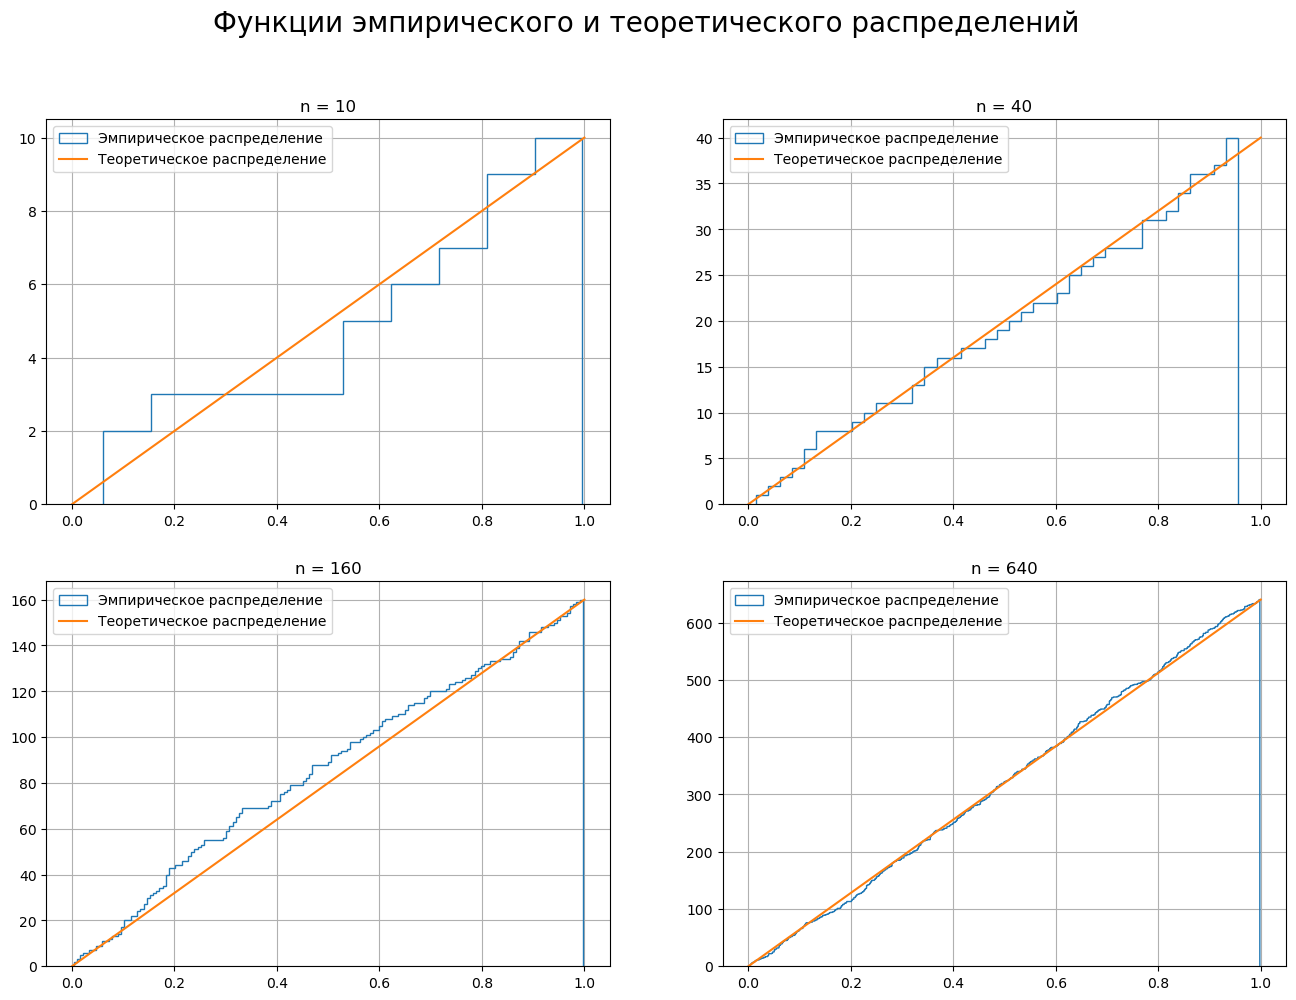

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 11))
ax = ax.ravel()
ax[0].hist(data1, histtype='step', cumulative=True, bins=n1, label = 'Эмпирическое распределение')
ax[0].plot(np.arange(0, 1 + 1/n1, 1/n1), np.arange(0, n1+1, 1), label = 'Теоретическое распределение')
ax[0].set_title(f'n = {n1}')
ax[0].legend(loc = 'upper left')
ax[0].grid()
ax[1].hist(data2, histtype='step', cumulative=True, bins=n2, label = 'Эмпирическое распределение')
ax[1].plot(np.arange(0, 1 + 1/n2, 1/n2), np.arange(0, n2+1, 1), label = 'Теоретическое распределение')
ax[1].set_title(f'n = {n2}')
ax[1].legend(loc = 'upper left')
ax[1].grid()
ax[2].hist(data3, histtype='step', cumulative=True, bins=n3, label = 'Эмпирическое распределение')
ax[2].plot(np.arange(0, 1 + 1/n3, 1/n3), np.arange(0, n3+1, 1), label = 'Теоретическое распределение')
ax[2].set_title(f'n = {n3}')
ax[2].legend(loc = 'upper left')
ax[2].grid()
ax[3].hist(data4, histtype='step', cumulative=True, bins=n4, label = 'Эмпирическое распределение')
ax[3].plot(np.arange(0, 1 + 1/n4, 1/n4), np.arange(0, n4+1, 1), label = 'Теоретическое распределение')
ax[3].set_title(f'n = {n4}')
ax[3].legend(loc = 'upper left')
ax[3].grid()
fig.suptitle('Функции эмпирического и теоретического распределений', size = 20)

### 5. Центральная предельная теорема
#### 5.1. Содержание теоремы
Закон больших чисел утверждает, что при $n \rightarrow \inf$
$$
{1\over{n}} \sum\limits_{i=1}^n \xi_i \rightarrow a, \text{ где } a = M\xi_i.
$$
Центральная предельная теорема утверждает нечто большее, а именно, что при этом стремлении происходит нормализация:
$$
{1\over{n}} \sum\limits_{i=1}^n \xi_i ~ N(c, {\sigma^2\over{n}}), \text{ где } \sigma^2 = D\xi_i,
$$
то есть среднеарифметическое при больших $n$ распредлено приближенно по нормальному закону с дисперсией ${\sigma^2\over{n}}$; этот факт записывают иначе, нормируя сумму:
$$
{\sum\limits_{i=1}^n\xi_i - na\over{\sigma\sqrt{n}}} ~ N(0, 1).
$$
Приведем формулировку одной из теорем.  
**Теорема Линдеберга** Если последовательность взаимно независимых случайных величин $\xi_1, \xi_2, ..., \xi_n, ...$ при любом постоянном $\tau > 0$ удовлетворяет условию Линдеберга
$$
\lim\limits_{n \rightarrow \inf} {1\over{B^2}} \sum\limits_{k=1}^n \int\limits_{|x-a_k|>\tau B}(x-a_k)^2 dF_k(x) = 0, \text{ где } a_k = M\xi_k, B_n^2 = D\sum\limits_{k=1}^n\xi_k,
$$
то при $n \rightarrow \inf$ равномерно относительно $x$
$$
P \big( {\sum\limits_{k=1}^n(\xi_k - a_k) \over{\sqrt{D\sum\limits_{k=1}^n\xi_k}}} < x \big) \rightarrow {1\over{\sqrt{2\pi}}} \int\limits_{-\inf}^{x} e^{-z^2/2} dz
$$
**Следствие.** Если независимые случайные величины $\xi_1, \xi_2, ..., \xi_n, ...$ одинаково распределены и имеют конечную отличную от нуля дисперсию, то выполняется условие из теоремы Линдеберга. Условие Линдеберга в этом случае, то есть $M\xi_k = a, D\xi_k = \sigma^2, F_k(x) = F(x)$, принимает вид: при любом $\tau \gt 0$ и при $n \rightarrow \inf$
$$
\int\limits_{|x-a| \gt \tau \sigma \sqrt{n}} (x-a)^2 dF(x) \rightarrow 0;
$$
оно, очевидно, выполняется, поскольку интеграл по всей оси, то есть дисперсия, существует.  
Убедимся статистически в том, что сумма нескольких случайных величин распределена приближенно по нормальному закону.

#### 5.2 Одинаково распределенные слагаемые
Сделаем это на примере суммы
$$
S = \sum\limits_{k=1}^m x_k
$$
шести ($m=6$) незавимисых случайных величин, имеющих beta-распределение с параметрами $a=b=0.5$, плотность которого
$$
p(x|a, b) = {x^{a-1}(1-x)^{b-1}\over{B(a, b)}} = {1\over{\pi}} {1\over{\sqrt{x(1-x)}}}, \text{ где } B(a, b) = \int\limits_0^1 z^{a-1}(1-z)^{b-1} dz \text{ - beta-функция.}
$$
Плотность при выбранных значениях параметров имеет U-образный вид, весьма далекий от нормального; убедимся в этом, построив график плотности.  
Чтобы статистически оценить закон распределения для суммы $S$, следует многократно, $N$ раз (например, $N=500$), промоделировать суммирование: получим $S_1, S_2, ..., S_N$ - выборку для суммы; для этой выборки построим гистограмму и сравним ее визуально с нормальной плотностью.

In [52]:
n = 500
data = np.array([np.array([np.random.beta(0.5, 0.5) for _ in range(n)]) for _ in range(6)])
s2 = data[0] + data[1]
s4 = s2 + data[2] + data[3]
s6 = s4 + data[4] + data[5]
data = np.vstack([data, s2, s4, s6])

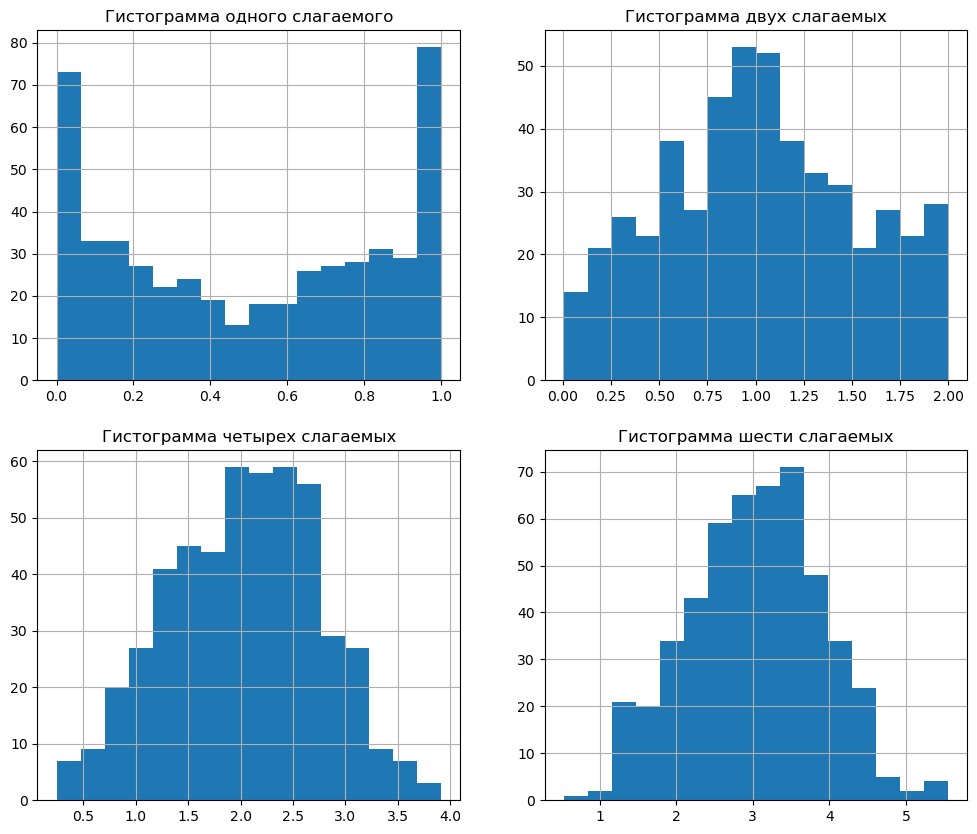

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax = ax.ravel()
ax[0].hist(data[0], bins=16)
ax[0].set_title('Гистограмма одного слагаемого')
ax[0].grid()
ax[1].hist(data[6], bins=16)
ax[1].set_title('Гистограмма двух слагаемых')
ax[1].grid()
ax[2].hist(data[7], bins=16)
ax[2].set_title('Гистограмма четырех слагаемых')
ax[2].grid()
ax[3].hist(data[8], bins=16)
ax[3].set_title('Гистограмма шести слагаемых')
ax[3].grid()

#### 5.3 Различно распределенные слагаемые
Распределение суммы сходится к нормальному и в том случае, когда слагаемые распределены по раздичным законам.

**Задание 1.** Оценить экспрериментально распределение для суммы $S = \sum\limits_{i=1}^6 \xi_i$ шести слагаемых, распределенных по различным законам; выберем их из семейства beta-распределений, задав следующие параметры:

In [54]:
pd.DataFrame({'1': [1, 0.5], '2': [0.5, 1], '3': [1, 1],
              '4': [1, 2], '5': [2, 1], '6': [2, 2]},
            index=['a', 'b'])

,1,2,3,4,5,6
a,1.0,0.5,1,1,2,2
b,0.5,1.0,1,2,1,2


Сгенерируем выборку для суммы и построим гистограмму для нее. Убедимся в том, что распределение близко к нормальному. Выведем гистограммы для слагаемых и для суммы.

In [55]:
n = 500
data = []
data.append(np.array([np.random.beta(1, 0.5) for _ in range(n)]))
data.append(np.array([np.random.beta(0.5, 1) for _ in range(n)]))
data.append(np.array([np.random.beta(1, 1) for _ in range(n)]))
data.append(np.array([np.random.beta(1, 2) for _ in range(n)]))
data.append(np.array([np.random.beta(2, 1) for _ in range(n)]))
data.append(np.array([np.random.beta(2, 2) for _ in range(n)]))
data = np.array(data)

s = data[0] + data[1] + data[2] + data[3] + data[4] + data[5]
data = np.vstack([data, s])

Text(0.5, 0.98, 'Различные бета-распределения')

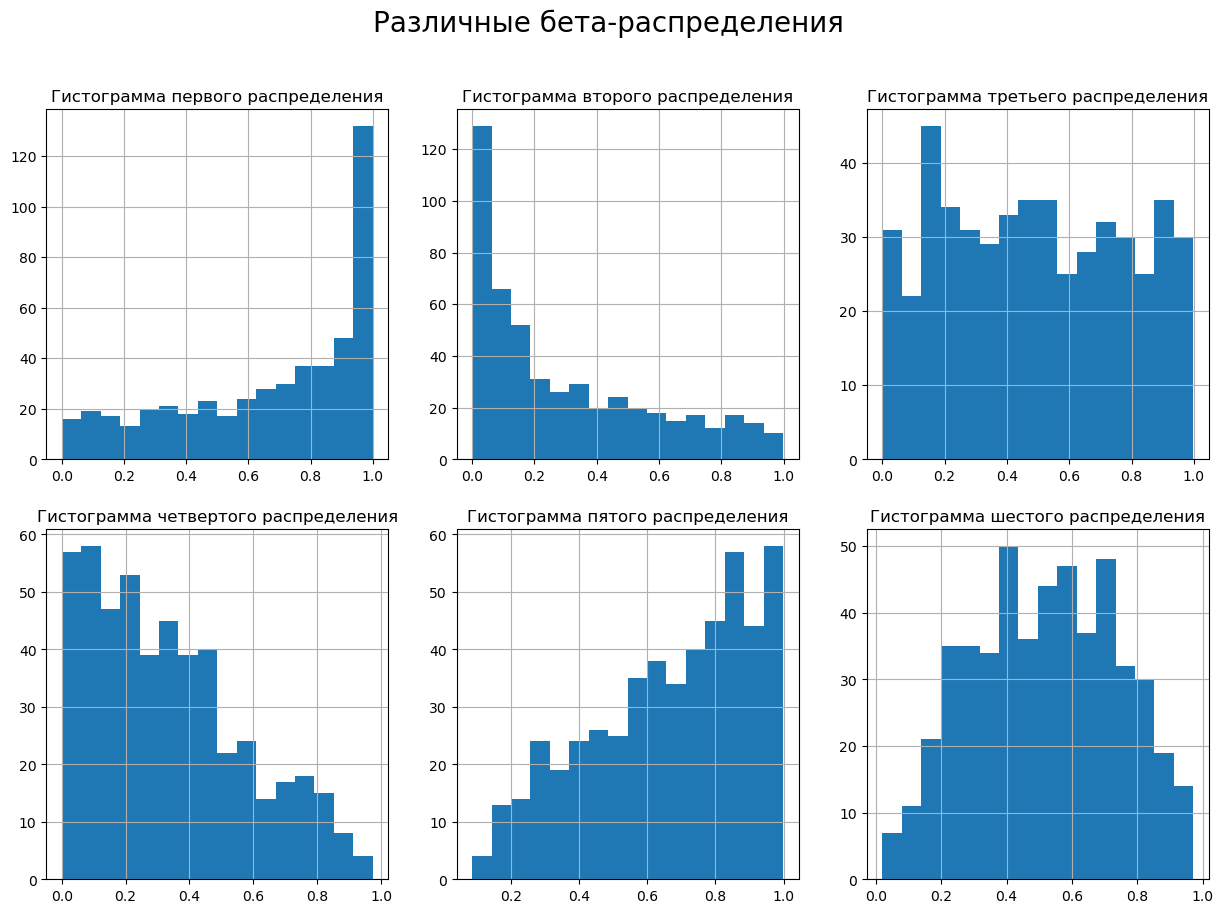

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.ravel()
ax[0].hist(data[0], bins=16)
ax[0].set_title('Гистограмма первого распределения')
ax[0].grid()
ax[1].hist(data[1], bins=16)
ax[1].set_title('Гистограмма второго распределения')
ax[1].grid()
ax[2].hist(data[2], bins=16)
ax[2].set_title('Гистограмма третьего распределения')
ax[2].grid()
ax[3].hist(data[3], bins=16)
ax[3].set_title('Гистограмма четвертого распределения')
ax[3].grid()
ax[4].hist(data[4], bins=16)
ax[4].set_title('Гистограмма пятого распределения')
ax[4].grid()
ax[5].hist(data[5], bins=16)
ax[5].set_title('Гистограмма шестого распределения')
ax[5].grid()
fig.suptitle('Различные бета-распределения', size = 20)

Text(0.5, 1.0, 'Сумма различных распределений')

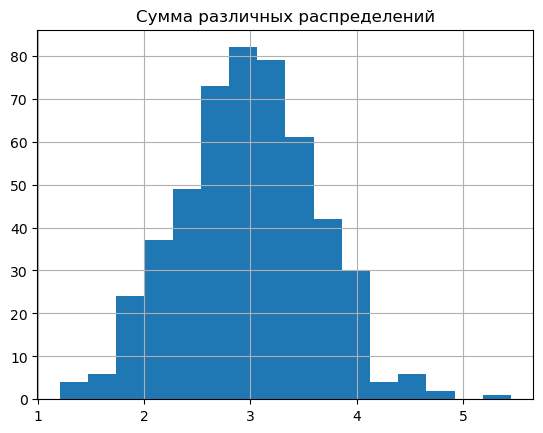

In [57]:
plt.hist(data[6], bins=16)
plt.grid()
plt.title('Сумма различных распределений')

Если же в сумме имеется слагаемое, дисперсия которого существенно превышает все остальные, то приближенная нормальность места не имеет.  
**Задание 2.** Проверить это (получить гистограмму), добавив 7-у слагаемое, имеющее beta-распределение c параметрами $a=b=0.5$ и умноженное на 1000.

In [58]:
n = 500
data = []
data.append(np.array([np.random.beta(1, 0.5) for _ in range(n)]))
data.append(np.array([np.random.beta(0.5, 1) for _ in range(n)]))
data.append(np.array([np.random.beta(1, 1) for _ in range(n)]))
data.append(np.array([np.random.beta(1, 2) for _ in range(n)]))
data.append(np.array([np.random.beta(2, 1) for _ in range(n)]))
data.append(np.array([np.random.beta(2, 2) for _ in range(n)]))
data.append(np.array([np.random.beta(0.5, 0.5) * 1000 for _ in range(n)]))
data = np.array(data)

s = data[0] + data[1] + data[2] + data[3] + data[4] + data[5] + data[6]

Text(0.5, 1.0, 'Дополнительное распределение')

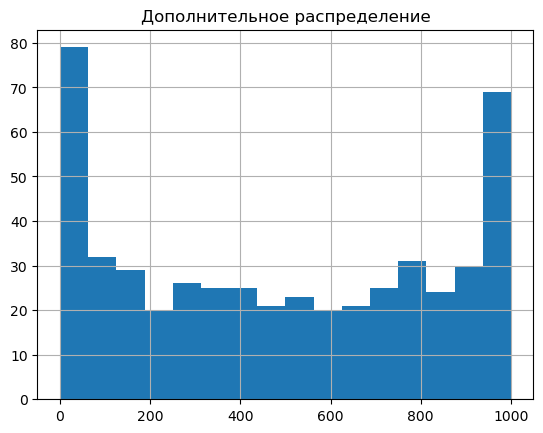

In [59]:
plt.hist(data[6], bins=16)
plt.grid()
plt.title('Дополнительное распределение')

Text(0.5, 1.0, 'Сумма различных распределений (с дополнением)')

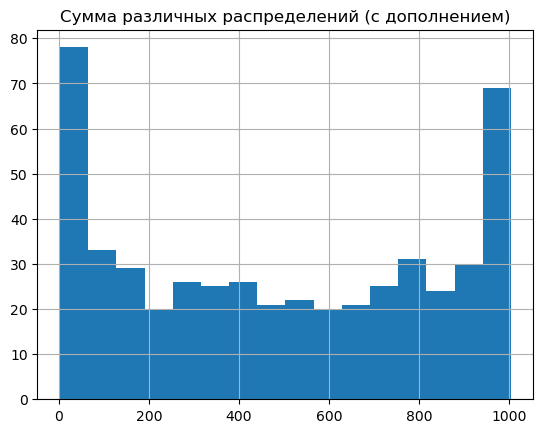

In [60]:
plt.hist(s, bins=16)
plt.grid()
plt.title('Сумма различных распределений (с дополнением)')

Как видно, в данном случае нормальность не имеет места.